In [1]:
import json 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

import string
# import nltk
from nltk import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D , Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import callbacks

In [2]:
with open("../data/Intent.json") as train_file:
    df= json.load(train_file)

# TOKENIZATION

In [3]:
df["intents"][0]["intent"]

'Greeting'

In [4]:
tags = []
inputs = []
responses = {}

for intent in df['intents']:
    responses[intent['intent']] = intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        tags.append(intent['intent'])
df = pd.DataFrame({'inputs': inputs, 'tags': tags})
df

,inputs,tags
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
...,...,...
138,Can you prove you have a conscious,SelfAware
139,Can you prove you are self-aware please,SelfAware
140,Can you prove you are self aware please,SelfAware
141,Can you prove you have a conscious please,SelfAware


In [5]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [6]:
# Tokenizer les data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df["inputs"])
train = tokenizer.texts_to_sequences(df["inputs"])
tokens = tokenizer.texts_to_sequences(df["inputs"])

In [7]:
# apply padding
x_train = pad_sequences(train)

In [8]:
#encoding the outputs
le = LabelEncoder()
Y_train = le.fit_transform(df['tags'])

In [9]:
input_shape = x_train.shape[1]
print(input_shape)

9


In [10]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length = le.classes_.shape[0]
print("output length ", output_length)

number of unique words : 117
output length  22


# DELETE OR ADD STOPWORDS

In [11]:
stop_words = stopwords.words("english")

In [12]:
# print(stop_words)
#this will show all the default stop word in the language english

In [13]:
stop_words.append("'s")
stop_words.append("n't")
#this will add or remove a stop word

In [14]:
inputs

['Hi',
 'Hi there',
 'Hola',
 'Hello',
 'Hello there',
 'Hya',
 'Hya there',
 'My user is Adam',
 'This is Adam',
 'I am Adam',
 'It is Adam',
 'My user is Bella',
 'This is Bella',
 'I am Bella',
 'It is Bella',
 'How are you?',
 'Hi how are you?',
 'Hello how are you?',
 'Hola how are you?',
 'How are you doing?',
 'Hope you are doing well?',
 'Hello hope you are doing well?',
 'Good thanks! My user is Adam',
 'Good thanks! This is Adam',
 'Good thanks! I am Adam',
 'Good thanks! It is Adam',
 'Great thanks! My user is Bella',
 'Great thanks! This is Bella',
 'Great thanks! I am Bella',
 'Great thanks! It is Bella',
 'What is my name?',
 'What do you call me?',
 'Who do you think I am?',
 'What do you think I am?',
 'Who are you talking to?',
 'What name do you call me by?',
 'Tell me my name',
 'What is your name?',
 'What could I call you?',
 'What can I call you?',
 'What do your friends call you?',
 'Who are you?',
 'Tell me your name?',
 'What is your real name?',
 'What is your

In [15]:
filtered_sentence = []

for line in inputs:
    filtered_sentence.append([w for w in word_tokenize(line) if not w.lower() in stop_words])

filtered_sentence = [' '.join(ele) for ele in filtered_sentence]

In [16]:
filtered_sentence

['Hi',
 'Hi',
 'Hola',
 'Hello',
 'Hello',
 'Hya',
 'Hya',
 'user Adam',
 'Adam',
 'Adam',
 'Adam',
 'user Bella',
 'Bella',
 'Bella',
 'Bella',
 '?',
 'Hi ?',
 'Hello ?',
 'Hola ?',
 '?',
 'Hope well ?',
 'Hello hope well ?',
 'Good thanks ! user Adam',
 'Good thanks ! Adam',
 'Good thanks ! Adam',
 'Good thanks ! Adam',
 'Great thanks ! user Bella',
 'Great thanks ! Bella',
 'Great thanks ! Bella',
 'Great thanks ! Bella',
 'name ?',
 'call ?',
 'think ?',
 'think ?',
 'talking ?',
 'name call ?',
 'Tell name',
 'name ?',
 'could call ?',
 'call ?',
 'friends call ?',
 '?',
 'Tell name ?',
 'real name ?',
 'real name please ?',
 'real name ?',
 'Tell real name ?',
 'real name ?',
 'real name please ?',
 'real name please ?',
 'time ?',
 'time ?',
 'know time ?',
 'know time ?',
 'tell time ?',
 'Tell time ?',
 'Time',
 'OK thank',
 'OK thanks',
 'OK',
 'Thanks',
 'Thank',
 'helpful',
 'talking',
 'talking',
 'talking',
 '',
 'meant',
 'communicating',
 'speaking',
 'understand saying

In [17]:
df_sw = pd.DataFrame({'inputs': filtered_sentence, 'tags': tags})
df_sw

,inputs,tags
0,Hi,Greeting
1,Hi,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello,Greeting
...,...,...
138,prove conscious,SelfAware
139,prove self-aware please,SelfAware
140,prove self aware please,SelfAware
141,prove conscious please,SelfAware


In [18]:
#duplicates
df_sw.drop_duplicates(inplace=True)

#####  la suite c'est la même

In [29]:
df = df_sw.copy()

In [30]:
df["inputs"] = df["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
df["inputs"] = df["inputs"].apply(lambda wrd:"".join(wrd))

In [31]:
# Tokenizer les data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(df["inputs"])
train = tokenizer.texts_to_sequences(df["inputs"])

In [43]:
# apply padding
# x_train = pad_sequences(train)
X_data = pad_sequences(train)

In [44]:
#encoding the outputs
le = LabelEncoder()
# Y_train = le.fit_transform(df['tags'])
y_data = le.fit_transform(df['tags'])

In [45]:
# input_shape = x_train.shape[1]
input_shape = X_data.shape[1]
print(input_shape)

5


In [36]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length = le.classes_.shape[0]
print("output length ", output_length)

number of unique words : 77
output length  22


In [37]:
from sklearn.model_selection import train_test_split

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(x_train, Y_train, test_size=0.3, random_state=42, stratify=Y_train)
X_train_data, X_test, y_train_data, y_test = train_test_split(X_data, y_data, test_size=0.19, random_state=42, stratify=y_data)

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.24, random_state=42, stratify=y_train_data)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69, 5)
(22, 5)
(69,)
(22,)


In [51]:
#creating model
model_sw = Sequential()
model_sw.add(Embedding(vocabulary+1,10))
model_sw.add(InputLayer(input_shape=(input_shape,)))
model_sw.add(SimpleRNN(30))
model_sw.add(Dense(output_length, activation="softmax"))

In [52]:
#compile the model
model_sw.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [53]:
# early_stopping = callbacks.EarlyStopping(
#     patience=20,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

In [54]:
# early_stop = callbacks.EarlyStopping(monitor="loss",mode="min",verbose=1,patience=100)

In [55]:
# history = model_sw.fit(x_train, Y_train, epochs=100)
history = model_sw.fit(X_train,y_train, epochs=100, validation_data=(X_val, y_val))
# history = model_sw.fit(X_train,y_train, epochs=100, validation_split=0.3,callbacks=[early_stopping])
# pas de batch_size ?!

Epoch 1/100
3/3 [==============================] - 2s 184ms/step - loss: 3.0837 - accuracy: 0.0145 - val_loss: 3.0787 - val_accuracy: 0.1364
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 3.0716 - accuracy: 0.0580 - val_loss: 3.0756 - val_accuracy: 0.0455
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 3.0620 - accuracy: 0.0870 - val_loss: 3.0730 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 3.0537 - accuracy: 0.1159 - val_loss: 3.0701 - val_accuracy: 0.0909
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 3.0453 - accuracy: 0.1159 - val_loss: 3.0673 - val_accuracy: 0.0909
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 3.0369 - accuracy: 0.1159 - val_loss: 3.0645 - val_accuracy: 0.0909
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 3.0288 - accuracy: 0.1304 - val_loss: 3.0617 - val_accuracy: 0.1364
Epoch 8/100
3/3

3/3 [==============================] - 0s 21ms/step - loss: 2.0811 - accuracy: 0.6667 - val_loss: 2.5966 - val_accuracy: 0.2727
Epoch 60/100
3/3 [==============================] - 0s 21ms/step - loss: 2.0542 - accuracy: 0.6667 - val_loss: 2.5869 - val_accuracy: 0.2727
Epoch 61/100
3/3 [==============================] - 0s 20ms/step - loss: 2.0289 - accuracy: 0.6667 - val_loss: 2.5775 - val_accuracy: 0.2727
Epoch 62/100
3/3 [==============================] - 0s 20ms/step - loss: 2.0019 - accuracy: 0.6812 - val_loss: 2.5633 - val_accuracy: 0.2727
Epoch 63/100
3/3 [==============================] - 0s 20ms/step - loss: 1.9722 - accuracy: 0.6812 - val_loss: 2.5462 - val_accuracy: 0.2727
Epoch 64/100
3/3 [==============================] - 0s 18ms/step - loss: 1.9477 - accuracy: 0.6957 - val_loss: 2.5300 - val_accuracy: 0.2727
Epoch 65/100
3/3 [==============================] - 0s 21ms/step - loss: 1.9194 - accuracy: 0.6957 - val_loss: 2.5140 - val_accuracy: 0.3182
Epoch 66/100
3/3 [========

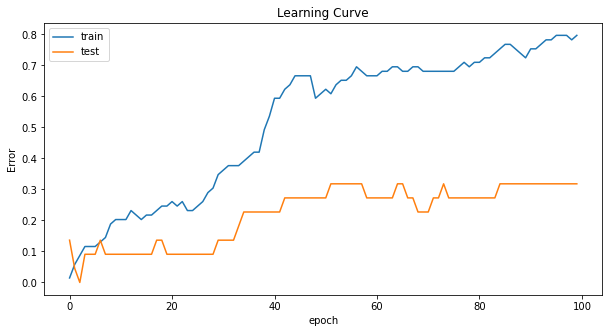

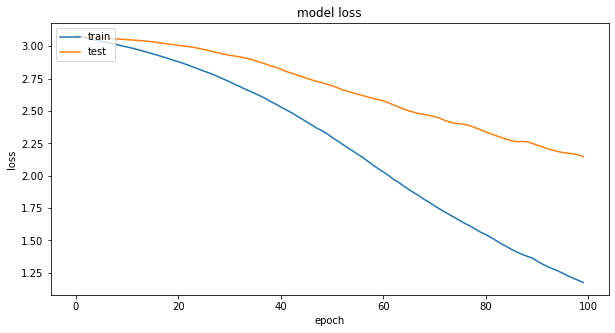

In [56]:
# #plotting model accuracy
# plt.plot(train_sw.history['accuracy'], label="training set accuracy")
# plt.plot(train_sw.history["loss"], label ="training set loss")
# plt.legend()

plt.figure(figsize=(10,5))

# summarize history for mae
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
while True:
    texts_p = []
    prediction_input = input("You : ")
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = "".join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    #getting output from model
    output = model_sw.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Bot :",random.choice(responses[response_tag]))
    if response_tag == "goodbye" :
        break

KeyboardInterrupt: Interrupted by user